In [1]:
from rich import print
from pyannote.core import notebook, Segment
SAMPLE_EXTENT = Segment(0, 30)
notebook.crop = SAMPLE_EXTENT

SAMPLE_CHUNK = Segment(15, 20)
ROOT_DIR = "/home/brooke_fujita/dev/pyannote-audio/tutorials/assets"
SAMPLE_URI = "sample"
#SAMPLE_WAV = f"{ROOT_DIR}/{SAMPLE_URI}.wav"
SAMPLE_REF = f"{ROOT_DIR}/{SAMPLE_URI}.rttm"

SAMPLE_WAV = "test_cowbell.wav"

In [2]:
import IPython

IPython.display.Audio(SAMPLE_WAV)

----

## Automatic Transcription with `whisper`


If you see errors like

> `RuntimeError: Failed to load audio: ffmpeg: error while loading shared libraries: libopenh264.so.5: cannot open shared object file: No such file or directory`

... then you need to create a softlink to the actual `libopenh264.so.n.n` object which you can find under the conda env's lib directory. Use `conda info` to locate the ...

In [3]:
import whisper

In [4]:
model = whisper.load_model("large")

In [5]:
transcription = model.transcribe(SAMPLE_WAV)

In [6]:
print(transcription['text'])

I gotta have more cowbell. Don't blow this for us, Gene! And if Bruce Dickinson wants more cowbell, we should 
probably give him more cowbell. Say it, baby. But the last time I checked, we don't have a whole lot of songs that 
feature the cowbell. I gotta have more cowbell, baby. If I just leave, and maybe I'll come back later, we can lay 
down the cowbell. Come on, baby. Gene, wait. Guess what. I got a fever. And the only prescription is more cowbell. 
I gotta have more cowbell, baby.

In [7]:
print(transcription['language'])

en

In [8]:
for seg in transcription['segments']:
    id = seg['id']
    st = seg['start']
    en = seg['end']
    tx = seg['text']
    print(f"{id}: start: {st}, end: {en}: {tx}")

0: start: 0.0, end: 2.8000000000000003:  I gotta have more cowbell.

1: start: 2.8000000000000003, end: 4.34:  Don't blow this for us, Gene!

2: start: 4.34, end: 6.34:  And if Bruce Dickinson wants more cowbell,

3: start: 6.34, end: 8.64:  we should probably give him more cowbell.

4: start: 8.64, end: 9.38:  Say it, baby.

5: start: 9.38, end: 12.88:  But the last time I checked, we don't have a whole lot of songs

6: start: 12.88, end: 14.18:  that feature the cowbell.

7: start: 14.18, end: 16.080000000000002:  I gotta have more cowbell, baby.

8: start: 16.080000000000002, end: 18.72:  If I just leave, and maybe I'll come back later,

9: start: 18.72, end: 20.22:  we can lay down the cowbell.

10: start: 20.22, end: 21.26:  Come on, baby.

11: start: 21.26, end: 22.72:  Gene, wait.

12: start: 22.72, end: 24.26:  Guess what.

13: start: 24.26, end: 26.26:  I got a fever.

14: start: 26.26, end: 29.76:  And the only prescription is more cowbell.

15: start: 29.76, end: 32.760000000000005:  I gotta have more cowbell, baby.

----

## Speaker Diarization with `pyannote.audio`

You will need to set up a new Access Token in order to use the `pyannote.audio` model.

* Go to https://huggingface.co/pyannote/speaker-diarization
   * Log into Hugging Face and accept the terms of conditions; prepare a new Access Token
* Use the `huggingface-cli` tool in the SSH shell to cache your Hugging Face token with
   * `huggingface-cli login`
   * enter your newly created Read access token for `pyannote`

In [9]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization")

Downloading:   0%|          | 0.00/500 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/318 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [10]:
diarization = pipeline(SAMPLE_WAV, num_speakers=4)

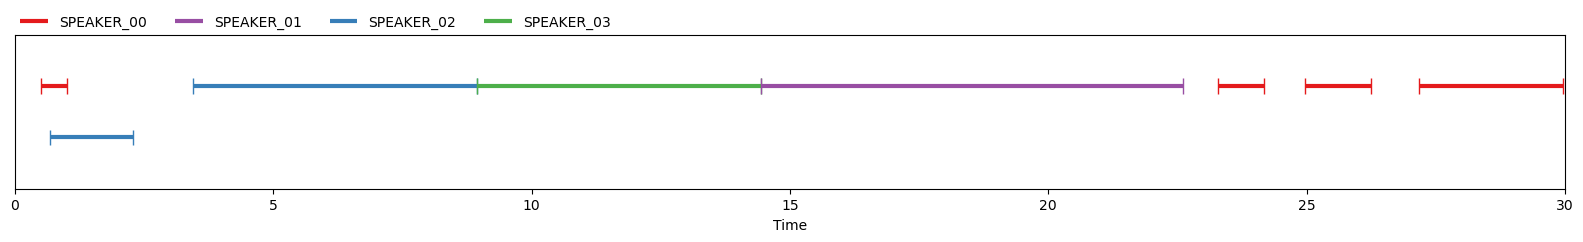

In [11]:
diarization

In [12]:
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")

start=0.5s stop=1.0s speaker_SPEAKER_00

start=0.7s stop=2.3s speaker_SPEAKER_02

start=3.5s stop=9.0s speaker_SPEAKER_02

start=9.0s stop=14.4s speaker_SPEAKER_03

start=14.4s stop=22.6s speaker_SPEAKER_01

start=23.3s stop=24.2s speaker_SPEAKER_00

start=25.0s stop=26.2s speaker_SPEAKER_00

start=27.2s stop=30.0s speaker_SPEAKER_00